In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Test GTEx

In [2]:
## loading GTEx data
p,x,n_full,cate_name = load_GTEx_full(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,n_sample=n_full,verbose=True)

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,n_sample=n_full,lamb=0.995,verbose=True)

## Load GTEx full data ##
# all hypothesis: 10623893
# filtered hypothesis: 169301
# p=0.00226011, x=[13.73583078  0.08957559  0.112      16.        ]
# p=0.00254028, x=[13.74614226  0.08957559  0.         16.        ]
# p=0.000610689, x=[13.74784609  0.08957559  0.         16.        ]
# p=0.00071358, x=[1.37478546e+01 8.95755866e-02 1.20000000e-02 1.60000000e+01]
# p=0.000228687, x=[13.74820448  0.08957559  0.209      13.        ]


## bh testing summary ##
# n_rej = 29348
# t_rej = 0.000276


## sbh summary ##
# n_rej = 29689
# t_rej = 0.000286
# pi_0 estimate = 0.975




## PrimFDR_init starts
# Learning null distribution
Slope: w=0.9099859516149752, a=[ 0.74234863 -0.13649902 -0.42949707]
Bump 0: w=0.015385181962227858, mu=[0.34887174 0.84227827 0.68525004], sigma=[0.16481291 0.0721538  0.13889525]
Bump 1: w=0.007144923126112109, mu=[0.36682701 0.30756909 0.2841555 ], sigma=[0.06347639 0.13778799 0.09547669]
Bump 2: w=0.024793643951622618, mu=[0.85973343 0.2765868  0.36678945], sigma=[0.06349551 0.12464883 0.14567777]
Bump 3: w=0.00879605456224746, mu=[0.36206006 0.14739877 0.5396052 ], sigma=[0.14483446 0.05146055 0.16998649]
Bump 4: w=0.03389424478281468, mu=[0.84859926 0.76531926 0.46049363], sigma=[0.0625595  0.11314427 0.20241685]


# Learning alternative distribution
Slope: w=0.8751289320640436, a=[-1.11315918  0.25411621  0.54705566]
Bump 0: w=0.04024848580320888, mu=[0.58038303 0.52647656 0.77302074], sigma=[0.08416872 0.1822686  0.10773705]
Bump 1: w=0.027022722079394976, mu=[0.1685875  0.33885353 0.44986031], sigma=[0.06177613 0.12121683 0.1

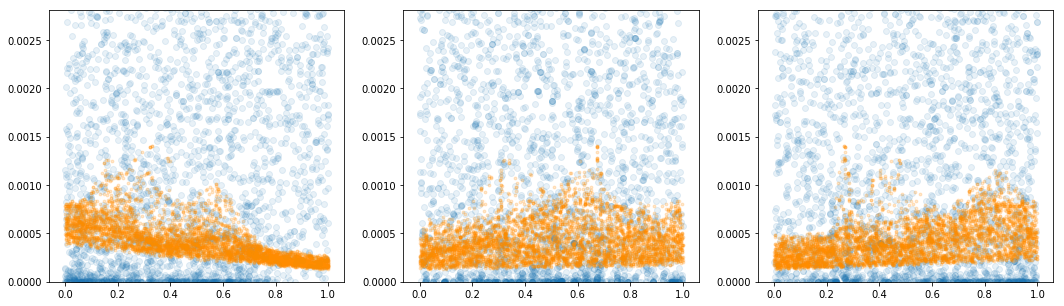

## PrimFDR_init finishes

gamma1 0.2420496148496512
0 0.9999999999999998 117488 51813 0.44100674111398613
0 0.4999999999999999 117488 51813 0.44100674111398613
0 0.24999999999999994 117488 51813 0.44100674111398613
0 0.12499999999999997 117488 51813 0.44100674111398613
0 0.062499999999999986 113222 47763 0.4218526434791825
0 0.031249999999999993 87405 29686 0.3396373205194211
0 0.015624999999999997 60699 14658 0.24148668017595018
0 0.007812499999999998 44578 7289 0.1635111489972632
0 0.003906249999999999 34370 3563 0.10366598778004073
0 0.0019531249999999996 26852 1790 0.06666170117682109
0.0009765624999999998 0.0019531249999999996 30590 2722 0.08898332788492971
0.0014648437499999996 0.0019531249999999996 32506 3117 0.09588998954039255
0.0017089843749999996 0.0019531249999999996 33353 3333 0.09993104068599526
0.0018310546874999996 0.0019531249999999996 33938 3449 0.10162649537391714
0.0018310546874999996 0.0018920898437499996 33591 3396 0.10109850852907029
0.0018310546874999996 0.00186

In [ ]:
n_rej,t,_=PrimFDR(p,x[:,[0,1,3]],5,alpha=0.1,h=None,n_itr=5000,verbose=True)

In [ ]:
_=PrimFDR_cv(p,x[:,[0,1,3]],5,alpha=0.1,n_itr=10000,h=None,verbose=True)